In [39]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df = pd.read_excel(r"C:\Users\17b-132-se\Desktop\weather.xlsx")

In [40]:
X = df[['Basel Growing Degree Days [2 m elevation corrected]', 'Basel Wind Speed [10 m]', 'Basel Wind Direction [10 m]']]
y = df['Basel Temperature [2 m elevation corrected]']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())

Basel Growing Degree Days [2 m elevation corrected]    167
Basel Wind Speed [10 m]                                167
Basel Wind Direction [10 m]                            167
dtype: int64
167


In [43]:
X_train = X_train.dropna()
y_train = y_train.dropna()

In [44]:
# Fill missing values in X_train with column means
X_train = X_train.fillna(X_train.mean())

# Fill missing values in y_train with column mean
y_train = y_train.fillna(y_train.mean())

In [45]:
# Convert X_train and y_train to appropriate data types
X_train = X_train.astype(float)
y_train = y_train.astype(float)

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

C:\Users\17b-132-se\AppData\Local\Temp\ipykernel_33088\3340642071.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
C:\Users\17b-132-se\AppData\Local\Temp\ipykernel_33088\3340642071.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
C:\Users\17b-132-se\AppData\Local\Temp\ipykernel_33088\3340642071.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

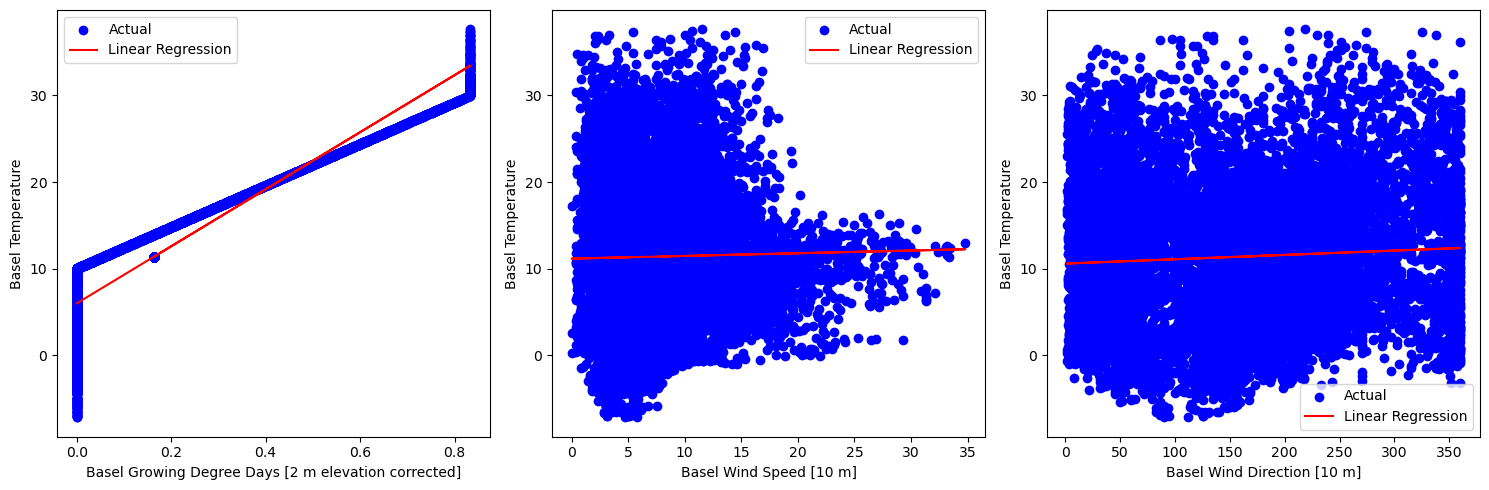

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming you have loaded the dataset into a pandas DataFrame called 'df'
X = df[["Basel Growing Degree Days [2 m elevation corrected]", "Basel Wind Speed [10 m]", "Basel Wind Direction [10 m]"]]
y = df["Basel Temperature [2 m elevation corrected]"]

# Fill missing values with mean or any other appropriate strategy
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Create subplots for each feature
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Perform linear regression for each feature and plot the results
for i, feature in enumerate(X.columns):
    model = LinearRegression()
    model.fit(X[[feature]], y)
    y_pred = model.predict(X[[feature]])

    axes[i].scatter(X[feature], y, color='blue', label='Actual')
    axes[i].plot(X[feature], y_pred, color='red', label='Linear Regression')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Basel Temperature")
    axes[i].legend()

plt.tight_layout()
plt.show()

In [47]:
print(df.isnull().sum())

timestamp                                                0
Basel Temperature [2 m elevation corrected]            214
Basel Growing Degree Days [2 m elevation corrected]    214
Basel Wind Speed [10 m]                                214
Basel Wind Direction [10 m]                            214
dtype: int64


In [48]:
print(X_test.isnull().sum())

Basel Growing Degree Days [2 m elevation corrected]    47
Basel Wind Speed [10 m]                                47
Basel Wind Direction [10 m]                            47
dtype: int64


In [49]:
X_test = X_test.dropna()

# Fill missing values in X_test with column means
X_test = X_test.fillna(X_test.mean())

# Convert X_test to appropriate data types
X_test = X_test.astype(float)

In [50]:
y_pred = model.predict(X_test)

In [51]:
print(y_test.shape, y_pred.shape)

(2468,) (2421,)


In [52]:
y_pred = y_pred[:len(y_test)]
y_test = y_test[:len(y_pred)]

In [53]:
import numpy as np
print(np.isnan(y_test).sum(), np.isnan(y_pred).sum())
print(np.isinf(y_test).sum(), np.isinf(y_pred).sum())

43 0
0 0


In [54]:
mask = np.logical_not(np.isnan(y_test)) & np.logical_not(np.isnan(y_pred))
y_test = y_test[mask]
y_pred = y_pred[mask]

In [55]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Absolute Error: 8.869460624055469
Mean Squared Error: 125.83121712586149
Root Mean Squared Error: 11.217451454134379
R-squared: -0.8504281510423986
